In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

2016-05-04 20:46:06,814 [INFO] graphlab.mxnet.base, 42: CUDA GPU support is activated




Loaded network /home/haijieg/py-faster-rcnn/data/faster_rcnn_models/coco_vgg16_faster_rcnn_final.caffemodel
Input image url or ID of scripps network query image: >>>http://www.ikea.com/ms/media/cho_room/20163/seating/20163_cols02a/20163_cols02a_01_PH132978.jpg
Opening:  http://www.ikea.com/ms/media/cho_room/20163/seating/20163_cols02a/20163_cols02a_01_PH132978.jpg
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Detection took 0.382s for 300 object proposals


rpn_matching.py:200: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  cropped = img[y:y1, x:x1, :]
rpn_matching.py:166: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  cropped = img[roi[1]:roi[3], roi[0]:roi[2], :]


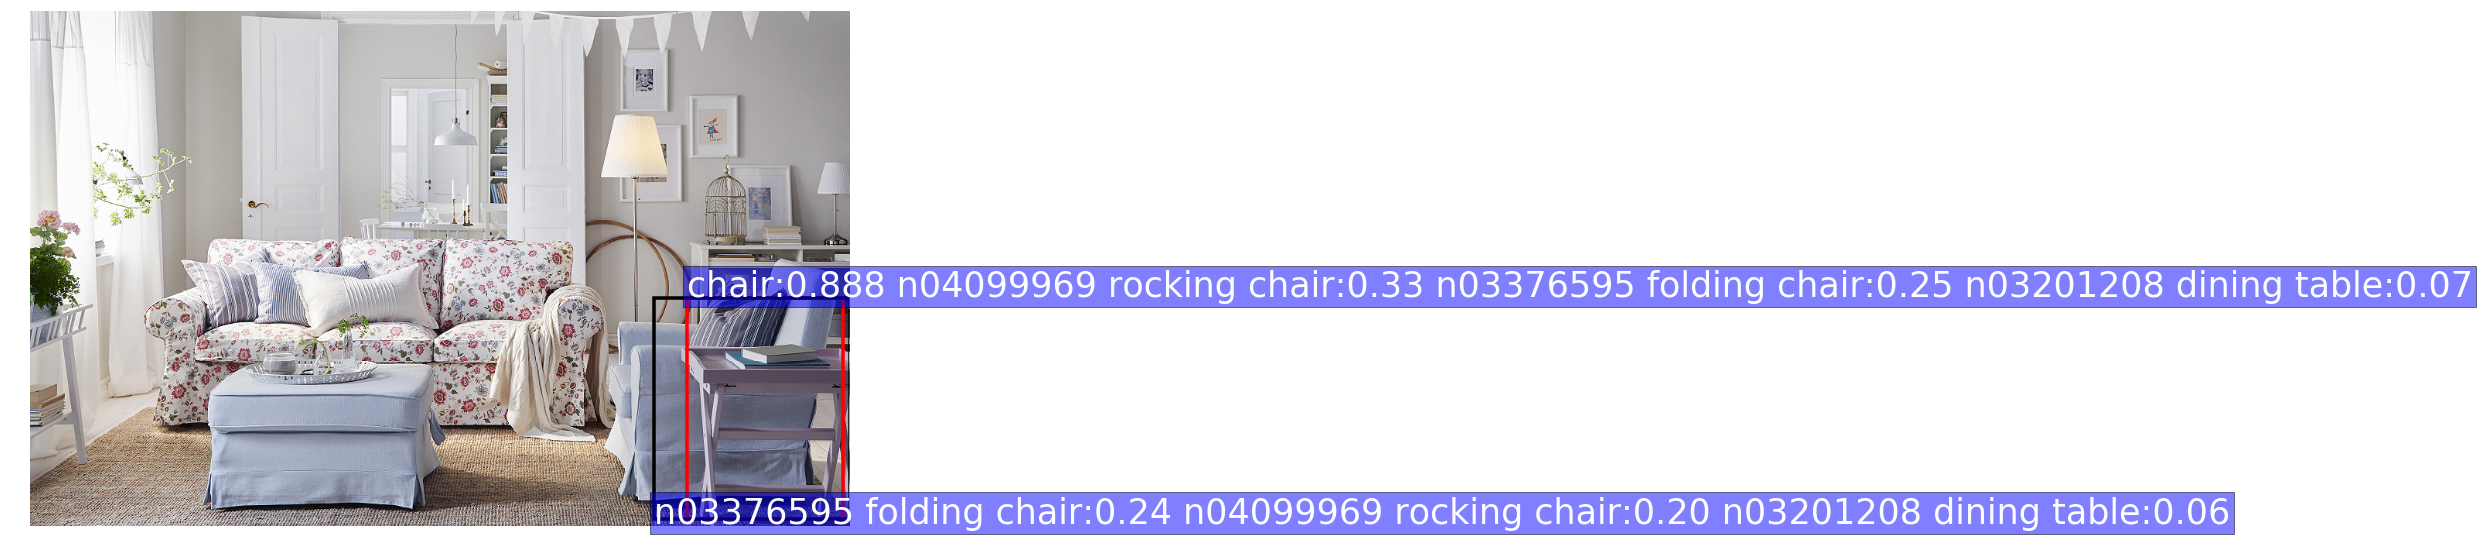

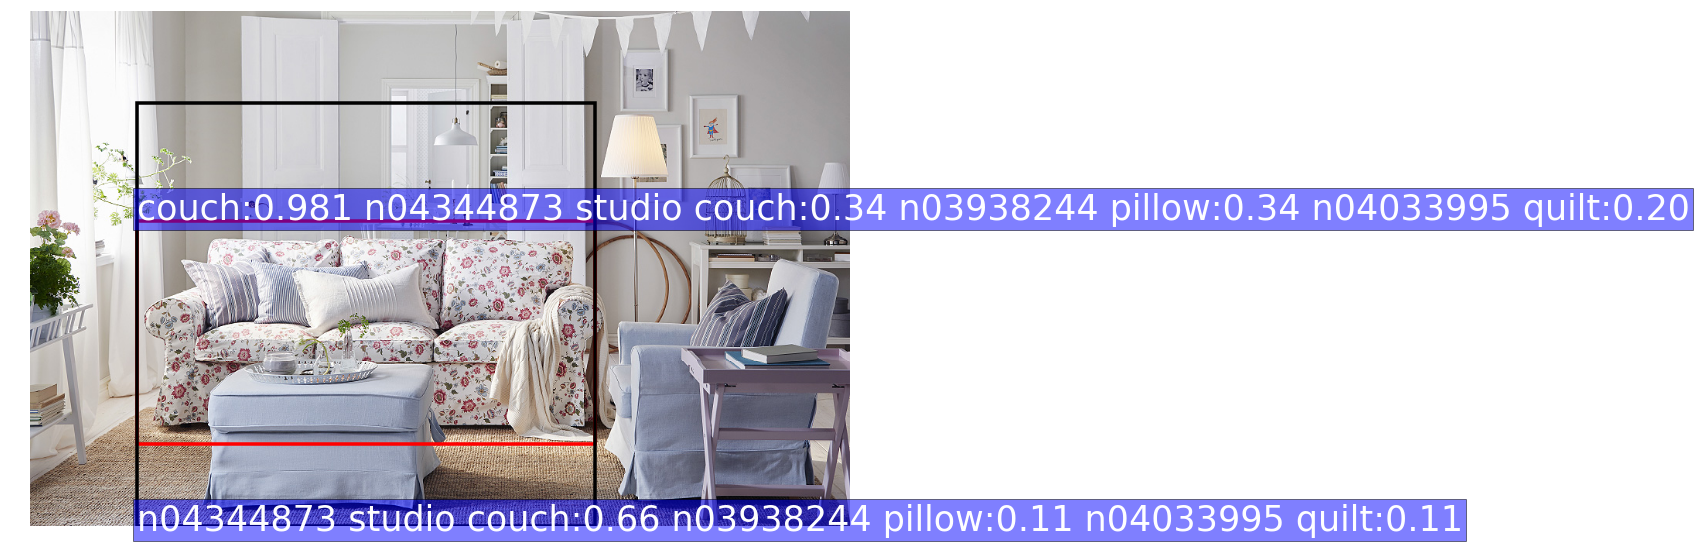

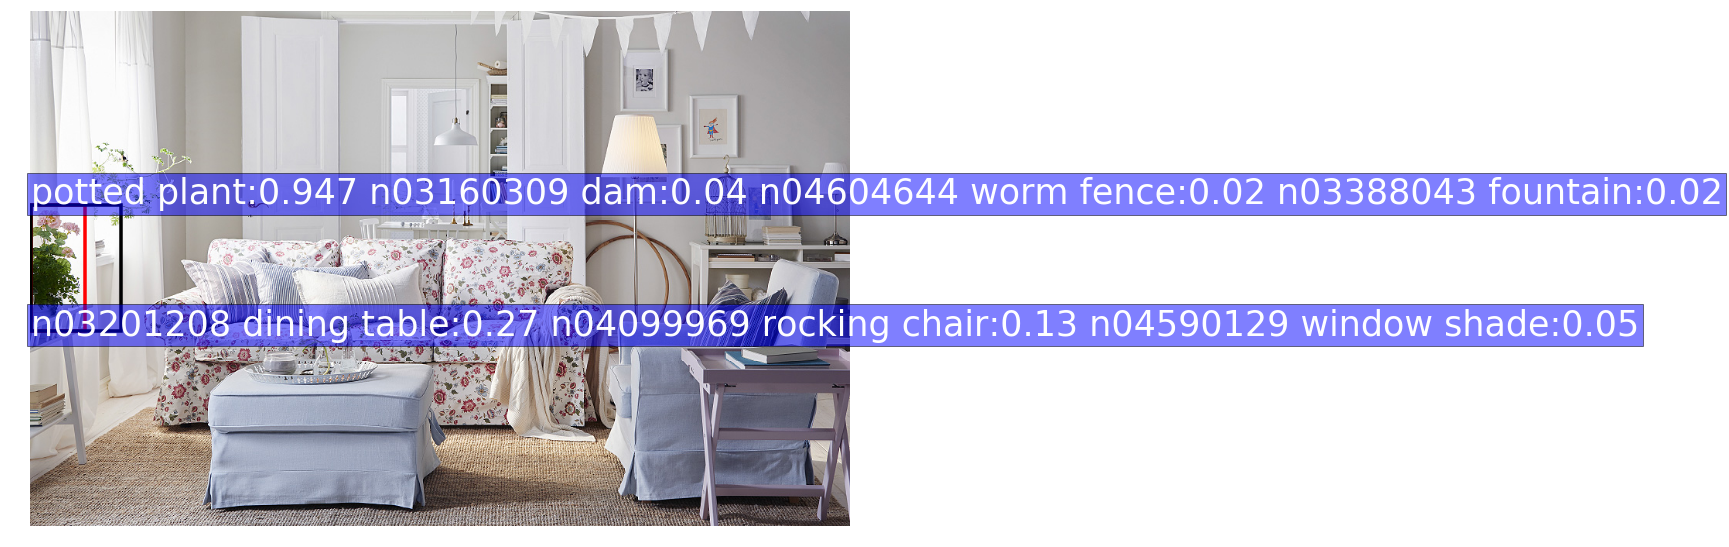

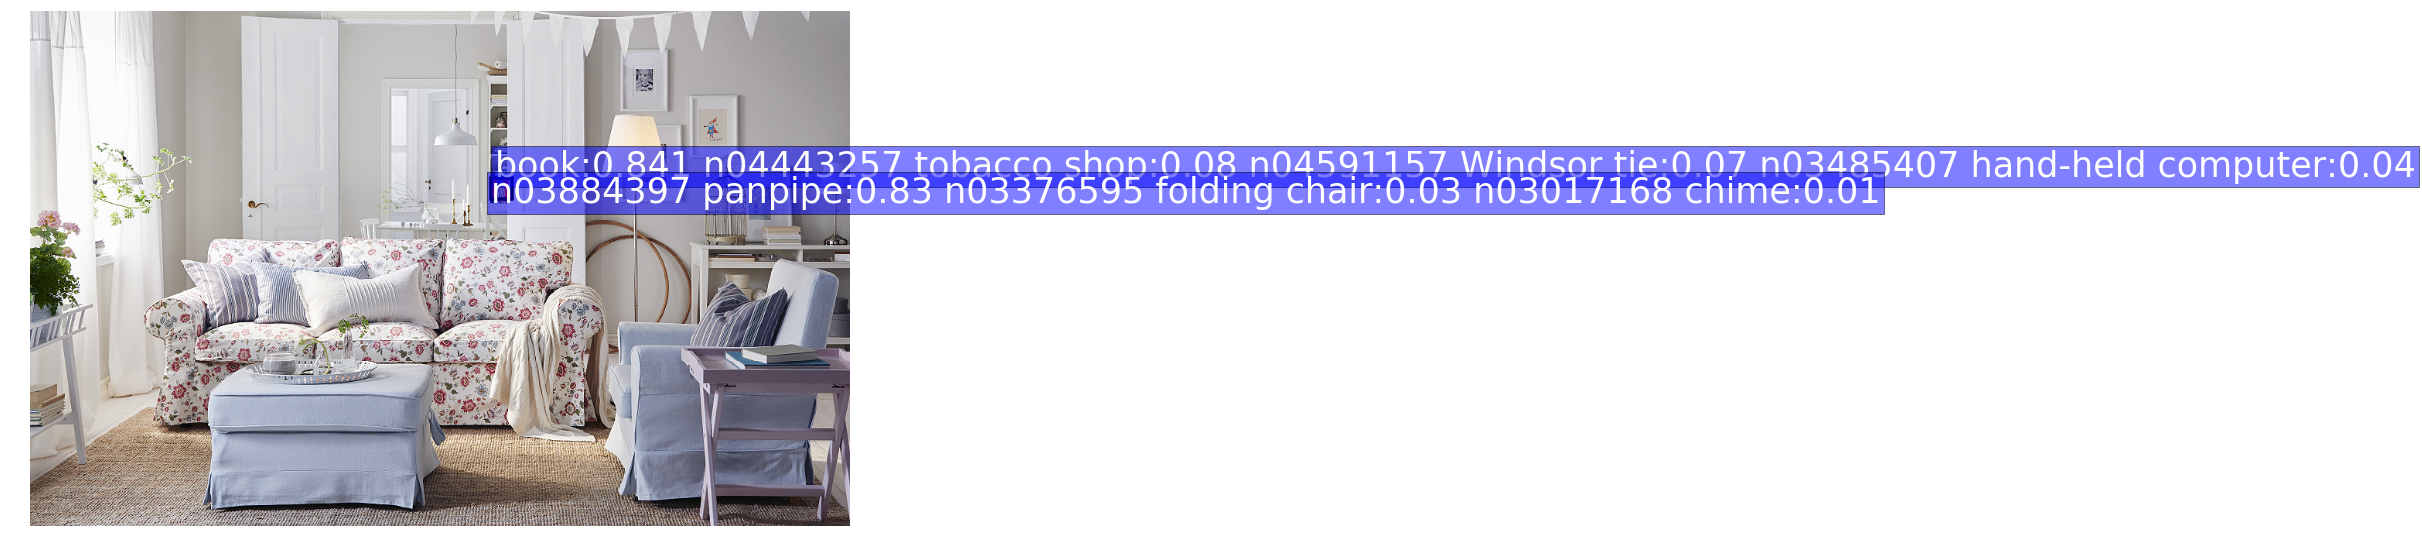

In [ ]:
%matplotlib inline
# can only use gpu 0, otherwise illegal mem access
%run demo_interactive.py --gpu 0

In [ ]:
import graphlab as gl
sf = gl.image_analysis.load_images('./crop_buff/')
sf = sf.sort('path')
sf['resized'] = gl.image_analysis.resize(sf['image'], 224, 224, 3)
alex = gl.load_model('./imagenet_iter_45/')

In [ ]:
%matplotlib inline
gl.canvas.set_target('ipynb')
sf['resized'][100:120].show()

In [ ]:
# get the map from ordinal label to txt
import cPickle as pickle
synset = pickle.load(open('wnid_to_label.pkl'))
wnid_txt = [l.strip() for l in open("../IKEA/models/inception_v3/synset.txt").readlines()]
wnids = synset.keys()
nums = synset.values()

wnid_txt_map = {}
for x in xrange(len(wnid_txt)):
    key = wnid_txt[x].split(' ')[0]
    value = x
    wnid_txt_map.update({key: value})
#print wnid_txt
#print wnid_txt_map.keys()[wnid_txt_map.values().index(1)]
pickle.dump(wnid_txt_map, open('wnid_txt_synset.pkl', 'wb'))
num_txt ={}
#print wnids[nums.index(572)]
#print synset
for x in xrange(1000):
    wnid = wnids[nums.index(x)]
    if len(str(wnid)) == 7:
        wnid = 'n0' + str(wnid)
    if len(str(wnid)) == 8:
        wnid = 'n' + str(wnid)
    num_txt.update({x: wnid_txt[wnid_txt_map.get(wnid)]})
#num_txt
pickle.dump(num_txt, open('num_txt_synset.pkl', 'wb'))

In [ ]:
# get prediction using GLC model
new_sf = sf[30:38]
pred = alex.predict_topk(new_sf, k=1)
new_sf["resized"].show()
gl.canvas.set_target('ipynb')
import os
if 'id' not in sf.column_names():
    sf = sf.add_row_number()
#pred_with_img = pred.join(sf, how="inner", on={"row_id": "id"})
#pred_with_img['resized'].show()
#pred_with_img["label"] = map(lambda x: num_txt.get(x), pred_with_img["class"])
pred["label"] = map(lambda x: num_txt.get(x), pred["class"])
print pred